# Netflix Movies and TV Shows Analysis

**Source**:<br>
__[Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows)__



**About this Dataset**: 
    
    Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.



 
**Column Description**:

- show_id: Unique ID for every Movie / Ts Show

- type: Identifier - A Movie or TV Show

- title: Title of the Movie / Tv Show

- director: Director of the Movie

- cast: Actors involved in the Movie / Tv Show

- country: Country where the Movie / Tv Show was produced

- date_added: Date it was added on Netflix

- release_year: Actual Release year of the Movie / Tv Show

- rating: TV Rating of the Movie / Tv Show

- duration: Total Duration - in minutes or number of seasons

- listed_in: Genre

- description: The summary description



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import missingno

In [2]:
df_n = pd.read_csv('netflix_titles.csv')

In [3]:
df_n.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8800 non-null object
duration        8807 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df_n['date_added'] = pd.to_datetime(df_n['date_added'])

In [6]:
df_n.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df_n[df_n.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
df_n.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

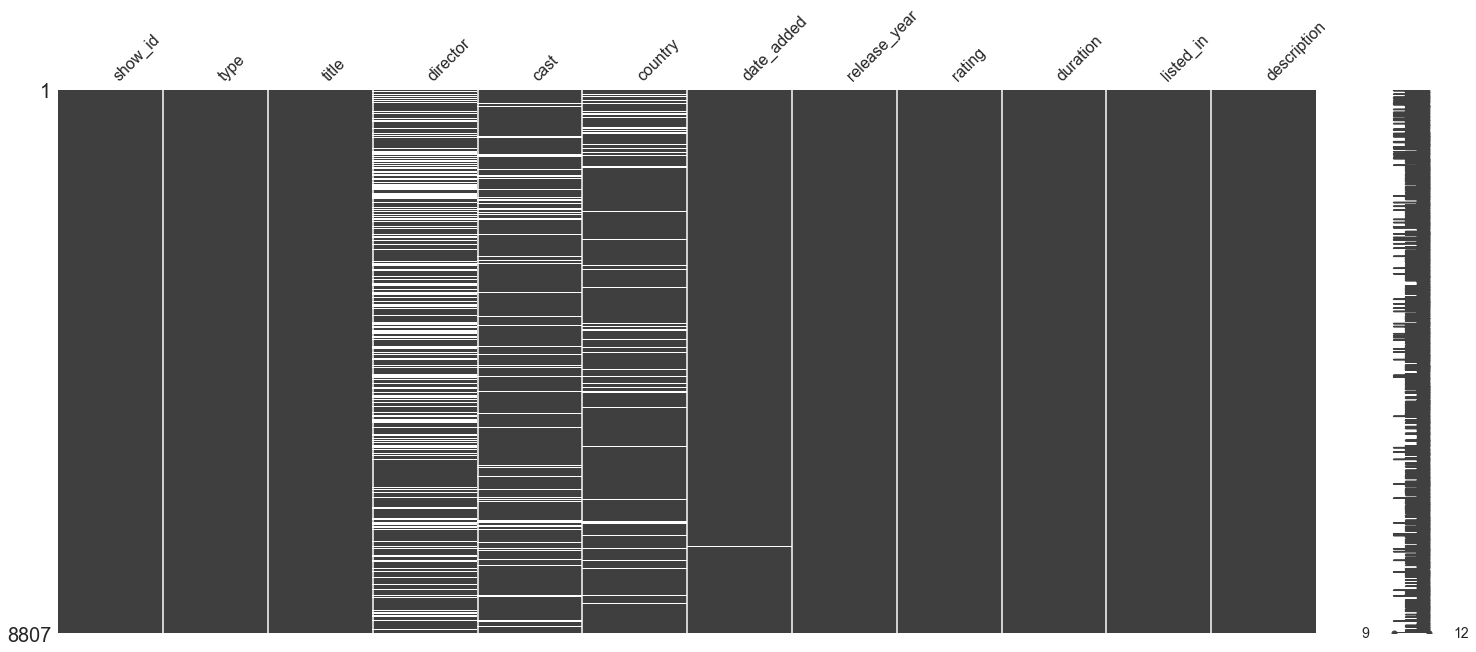

In [9]:
# Visualizing missing values
missingno.matrix(df_n)

<div class="alert alert-block alert-warning">

<b>Issues:</b>
- "director", "cast", "country", "date_added", "rating" columns have missing values 

</div>

**Solution to the missing values:**
- Droping the rows that have missing values in "data_added";
- For "director", "cast", "country", "rating": Replacing the "NaN" with "Unknown"

## Data Cleaning

In [10]:
df_n.dropna(subset=['date_added'], inplace=True)

In [11]:
df_n['director'].fillna('Unknown', inplace=True)
df_n['cast'].fillna('Unknown', inplace=True)
df_n['country'].fillna('Unknown', inplace=True)
df_n['rating'].fillna('Unknown', inplace=True)

In [12]:
df_n.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Base on the Film Rating System, we can conclude that 'NR' and 'UR' have the similar definition: If a film has not been submitted for a rating or is an uncut version of a film that was submitted.
<br>
So I would like to replace 'UR' with 'NR'

In [13]:
for i in df_n.index:
    if df_n.loc[i, 'rating'] == 'UR':
        df_n.loc[i, 'rating'] = 'NR'

In [14]:
# Store the cleaned data set into a csv file
df_n.reset_index(drop=True)
df_n.to_csv('Cleaned_Netflix.csv', index=False)

## EDA and Feature Engineering

In [15]:
df = pd.read_csv('Cleaned_Netflix.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
show_id         8797 non-null object
type            8797 non-null object
title           8797 non-null object
director        8797 non-null object
cast            8797 non-null object
country         8797 non-null object
date_added      8797 non-null object
release_year    8797 non-null int64
rating          8797 non-null object
duration        8797 non-null object
listed_in       8797 non-null object
description     8797 non-null object
dtypes: int64(1), object(11)
memory usage: 824.8+ KB


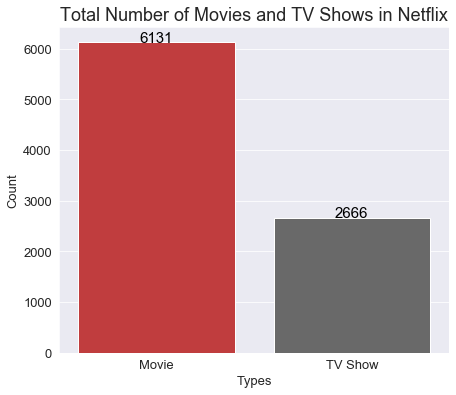

In [17]:
plt.figure(figsize=(7,6))
ax1 = sns.countplot(data = df, x = 'type', palette=['tab:red', 'dimgrey'])

for p in ax1.patches:
    ax1.text(p.get_x()+p.get_width()/2., p.get_height()+0.1, p.get_height(), ha='center', color='black', size=15)

plt.title('Total Number of Movies and TV Shows in Netflix', fontsize=18)
plt.xlabel('Types', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('BarChart_Types')

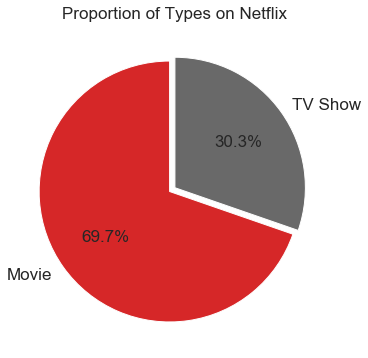

In [18]:
plt.figure(figsize=(7,6))

ax2 = plt.pie(df.type.value_counts(), labels=df.type.unique(), startangle=90, autopct='%1.1f%%', 
              explode=[0.05, 0], colors=['tab:red', 'dimgrey'], textprops={'fontsize':17})

plt.title('Proportion of Types on Netflix', fontsize=17)

plt.savefig('PieChart_Types')

> **From above 2 charts, we can observed that the amount of movies on Netflix are greater than the amount of TV shows(70% of Movies vs 30% of TV Shows).**

> **Compare to TV series, movie is the dominant factor to attract potential customers.**

> **The average movie duration is 100 minutes. Instead of finishing the whole season of a TV show, a 100 minutes movie can be more easier to satisfy people's entertainment needs. Increasing number of movies can help Netflix to attract more visitors/customers.**

> **On the other hand, TV series can be a great factor on customer stickiness.**

In [19]:
df['add_year'] = df.date_added.apply(lambda x: int(str(x)[:4]))

In [20]:
df['add_year-month'] = df.date_added.apply(lambda x: str(x)[:7])

In [21]:
total_added = df.groupby('add_year').count()['title'].to_frame(name = 'Number of Movies/TV Shows added')

In [22]:
total_added.to_csv('total_add.csv')

In [23]:
print(total_added)

          Number of Movies/TV Shows added
add_year                                 
2008                                    2
2009                                    2
2010                                    1
2011                                   13
2012                                    3
2013                                   11
2014                                   24
2015                                   82
2016                                  429
2017                                 1188
2018                                 1649
2019                                 2016
2020                                 1879
2021                                 1498


In [24]:
type_added_count = df.groupby(['add_year','type']).count()['title'].to_frame(name = 'count')

In [25]:
type_added_count.to_csv('type_added_per_year.csv')

In [26]:
print(type_added_count)

                  count
add_year type          
2008     Movie        1
         TV Show      1
2009     Movie        2
2010     Movie        1
2011     Movie       13
2012     Movie        3
2013     Movie        6
         TV Show      5
2014     Movie       19
         TV Show      5
2015     Movie       56
         TV Show     26
2016     Movie      253
         TV Show    176
2017     Movie      839
         TV Show    349
2018     Movie     1237
         TV Show    412
2019     Movie     1424
         TV Show    592
2020     Movie     1284
         TV Show    595
2021     Movie      993
         TV Show    505


> **Netflix launched its first original series in 2013**

> **Netflix removed its free trial in the U.S.**

In [27]:
# Proportion of movies/tv shows being added for each year
add_proportion = round(df.groupby(['add_year','type']).count()['title'] / df.groupby('add_year').count()['title'] * 100, 1).to_frame(name = 'proportion')

In [28]:
add_proportion.to_csv('type_added_proportion.csv')

In [29]:
print(add_proportion)

                  proportion
add_year type               
2008     Movie          50.0
         TV Show        50.0
2009     Movie         100.0
2010     Movie         100.0
2011     Movie         100.0
2012     Movie         100.0
2013     Movie          54.5
         TV Show        45.5
2014     Movie          79.2
         TV Show        20.8
2015     Movie          68.3
         TV Show        31.7
2016     Movie          59.0
         TV Show        41.0
2017     Movie          70.6
         TV Show        29.4
2018     Movie          75.0
         TV Show        25.0
2019     Movie          70.6
         TV Show        29.4
2020     Movie          68.3
         TV Show        31.7
2021     Movie          66.3
         TV Show        33.7


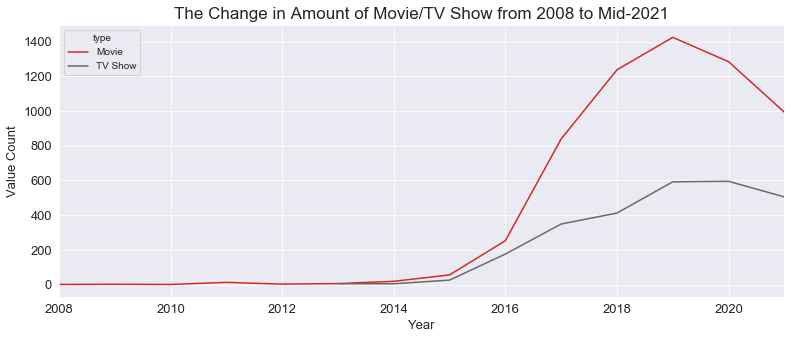

In [30]:
fix, ax = plt.subplots(figsize=(13,5))

ax3 = df.groupby(['add_year','type']).count()['title'].unstack().plot(ax=ax, color=['tab:red', 'dimgrey'], legend=True)

plt.title('The Change in Amount of Movie/TV Show from 2008 to Mid-2021', fontsize=17)
plt.ylabel('Value Count', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.tick_params(axis='both', labelsize=13)

plt.show()

- In 2008, Netflix add 1 movie and 1 TV Show to the its steaming platform.
- Netflix didn't add any TV Shows between 2009 and 2012.
- Starting at 2016, the amount of movies on Netflix was growing rapidly.
- 2019 is a peak year for Netflix, but this may due to the pandemic outbreak from 2020.
- During the pandemic outbreak, the amount of movies being added fell rapidly, but the amount of TV shows did not have this trend.
- Since the data was only updated to mid-2021, an assumption we may make is that the amount of TV shows being added on Netflix can maintain at the same level as perious year.

### Top 10 Netflix Genres

In [31]:
# Extract all genres from listed_in column
listed_in = []
for i in range(len(df)):
    listed_in.extend(df.listed_in.iloc[i].split(','))

In [32]:
# Remove leading and trailing spaces from every string in the list
genre = [x.strip(' ') for x in listed_in]

In [33]:
# Count the number for every unique grenre
genre_dict = {}
for g in genre:
    genre_dict[g] = genre.count(g)

In [34]:
# Sort genre in descending order
genre_dict = sorted(genre_dict.items(), key=lambda x:x[1], reverse=True)

In [35]:
genre_dict = dict(genre_dict)

In [36]:
Netflix_genre = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['Count'])

In [37]:
# Genres can be found in Netflix
print(Netflix_genre)

                              Count
International Movies           2752
Dramas                         2427
Comedies                       1674
International TV Shows         1350
Documentaries                   869
Action & Adventure              859
TV Dramas                       762
Independent Movies              756
Children & Family Movies        641
Romantic Movies                 616
Thrillers                       577
TV Comedies                     574
Crime TV Shows                  469
Kids' TV                        449
Docuseries                      394
Music & Musicals                375
Romantic TV Shows               370
Horror Movies                   357
Stand-Up Comedy                 343
Reality TV                      255
British TV Shows                252
Sci-Fi & Fantasy                243
Sports Movies                   219
Anime Series                    175
Spanish-Language TV Shows       173
TV Action & Adventure           167
Korean TV Shows             

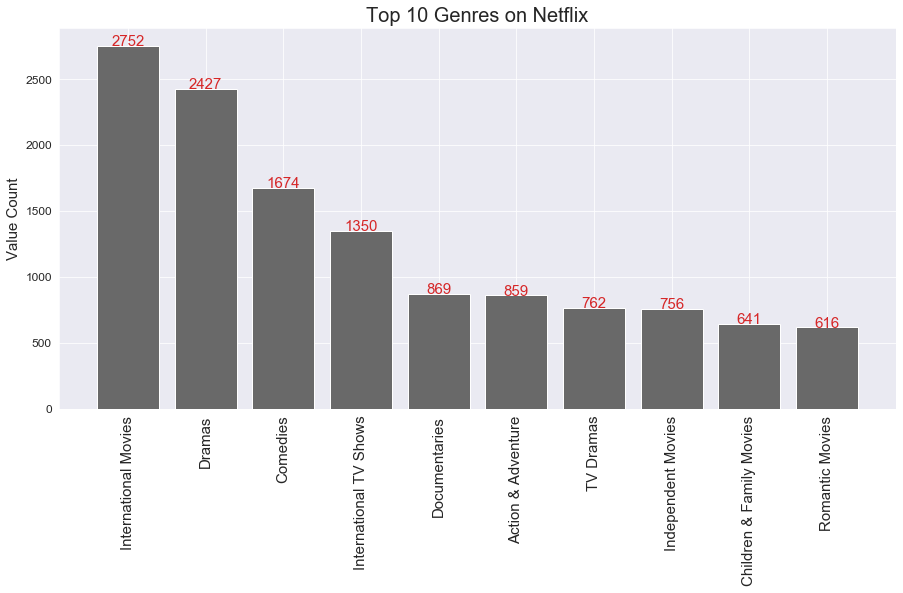

In [38]:
fig, ax = plt.subplots(figsize=(15,7))

ax4 = plt.bar(list(genre_dict.keys())[:10], list(genre_dict.values())[:10], color='dimgrey')

for p in ax4.patches:
    plt.text(p.get_x()+p.get_width()/2., p.get_height()+0.1, p.get_height(), ha='center', color='tab:red', size=15)

plt.title('Top 10 Genres on Netflix', fontsize=20)
plt.ylabel('Value Count', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15, rotation='90')

plt.show()

- Top 3 amount of genre in Netflix are: 'International Movies', 'Dramas', 'Comedies'

### Top 10 Producing Countries

In [39]:
country_l = []
for c in df.country:
    li = c.split(',')
    for i in li:
        country_l.append(i.strip())

In [40]:
country_d = {}
for x in country_l:
    country_d[x] = country_l.count(x)

In [41]:
country_d = sorted(country_d.items(), key=lambda x:x[1], reverse=False)

In [42]:
country_d = dict(country_d)

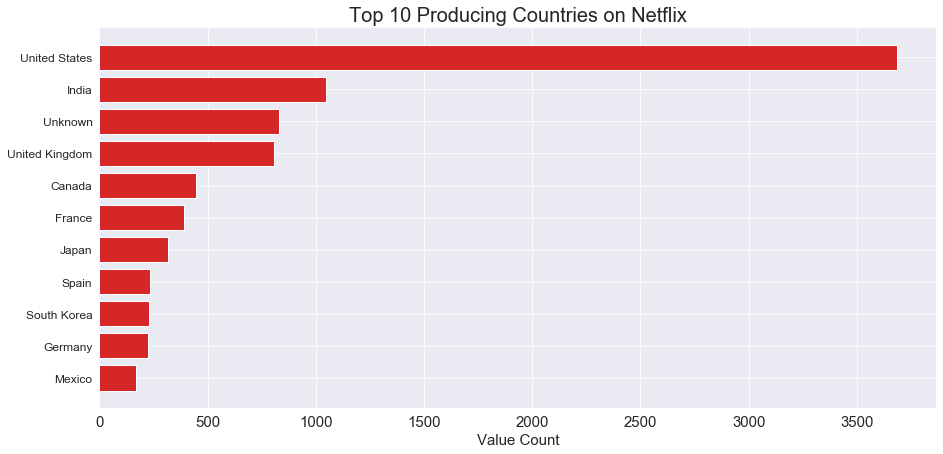

In [43]:
fig, ax = plt.subplots(figsize=(15,7))

# Showing top 11 since we have 'Unknown' country in our data set
ax5 = plt.barh(list(country_d.keys())[-11:], list(country_d.values())[-11:], color='tab:red')

plt.title('Top 10 Producing Countries on Netflix', fontsize=20)
plt.xlabel('Value Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.show()

### Movie/TV Show Duration distribution

In [44]:
movie_dur = df[df['type'] == 'Movie'][['type', 'duration']]

In [45]:
movie_dur.duration = movie_dur['duration'].str.replace(' min', '').astype(int)

In [46]:
# Average movie duration
movie_dur.duration.mean()

99.56499755341706

In [47]:
# Standard deviation of movie duration
movie_dur.duration.std()

28.289504416127716

In [48]:
# Top 5 movie duration
movie_dur.duration.value_counts().head()

90    152
93    146
94    146
97    146
91    144
Name: duration, dtype: int64

In [49]:
tv_dur = df[df['type'] == 'TV Show'][['type', 'duration']]

In [50]:
tv_dur.duration = tv_dur['duration'].apply(lambda x: int(x.split()[0]))

In [51]:
tv_dur.duration.value_counts()

1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
15       2
13       2
12       2
17       1
11       1
Name: duration, dtype: int64

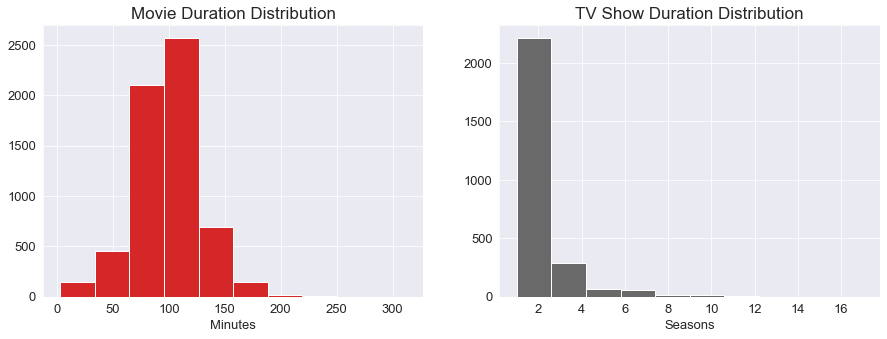

In [52]:
fig, (ax6, ax7) = plt.subplots(1, 2, figsize=(15,5))

ax6.hist(movie_dur.duration, color='tab:red')
ax6.set_title('Movie Duration Distribution', fontsize=17)
ax6.set_xlabel('Minutes', fontsize=13)
ax6.tick_params(axis='both', labelsize=13)

ax7.hist(tv_dur.duration, color='dimgrey')
ax7.set_title('TV Show Duration Distribution', fontsize=17)
ax7.set_xlabel('Seasons', fontsize=13)
ax7.tick_params(axis='both', labelsize=13)

plt.savefig('Distribution_Types')

### Movie/TV Show Rating

In [53]:
movie_rate = pd.DataFrame(df.groupby('type')['rating'].value_counts()['Movie'].sort_values(ascending=True))

In [54]:
tv_rate = pd.DataFrame(df.groupby('type')['rating'].value_counts()['TV Show'].sort_values(ascending=True))

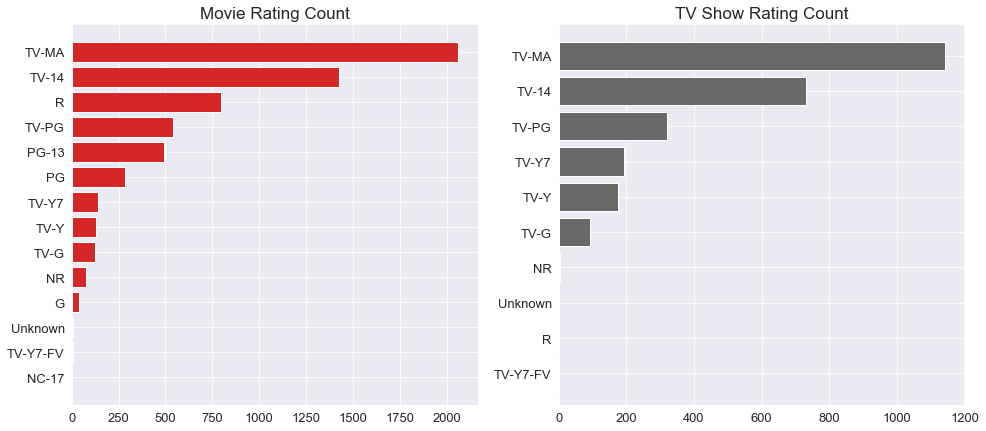

In [55]:
fig, (ax8, ax9) = plt.subplots(1, 2, figsize=(16,7))

ax8.barh(movie_rate.index, movie_rate.rating, color='tab:red')
ax8.set_title('Movie Rating Count', fontsize=17)
ax8.tick_params(axis='both', labelsize=13)

ax9.barh(tv_rate.index, tv_rate.rating, color='dimgrey')
ax9.set_title('TV Show Rating Count', fontsize=17)
ax9.tick_params(axis='both', labelsize=13)

plt.show()

- 'TV-MA' is the most common rating on Netflix.

### ---------------------------------------------------------------------------------------------------------------------

## Member Growth Analysis

> **The member growth data is collect from Netflix's Financial Statements which are published on Netflix's website (https://ir.netflix.net/financials/quarterly-earnings/default.aspx).**

In [56]:
df_member = pd.read_csv('Member_Growth.csv')

In [57]:
df_member

,Year,Quarter,Paid memberships at end of period,Paid net membership additions
0,2016,Q1,77707,6868
1,2016,Q2,79896,2189
2,2016,Q3,83278,3382
3,2016,Q4,89090,5812
4,2017,Q1,94363,5273
5,2017,Q2,99036,4673
6,2017,Q3,104023,4987
7,2017,Q4,110644,6621
8,2018,Q1,118902,8258
9,2018,Q2,124354,5452


In [58]:
df_member['addition_member_cum'] = df_member.groupby(['Year'])['Paid net membership additions'].cumsum()

In [59]:
df_member

,Year,Quarter,Paid memberships at end of period,Paid net membership additions,addition_member_cum
0,2016,Q1,77707,6868,6868
1,2016,Q2,79896,2189,9057
2,2016,Q3,83278,3382,12439
3,2016,Q4,89090,5812,18251
4,2017,Q1,94363,5273,5273
5,2017,Q2,99036,4673,9946
6,2017,Q3,104023,4987,14933
7,2017,Q4,110644,6621,21554
8,2018,Q1,118902,8258,8258
9,2018,Q2,124354,5452,13710


In [60]:
df_q4 = df_member[df_member['Quarter'] == 'Q4'].reset_index(drop=True)

In [61]:
df_q4

,Year,Quarter,Paid memberships at end of period,Paid net membership additions,addition_member_cum
0,2016,Q4,89090,5812,18251
1,2017,Q4,110644,6621,21554
2,2018,Q4,139259,8837,28615
3,2019,Q4,167090,8756,27831
4,2020,Q4,203660,8512,36573
5,2021,Q4,221840,8281,18181


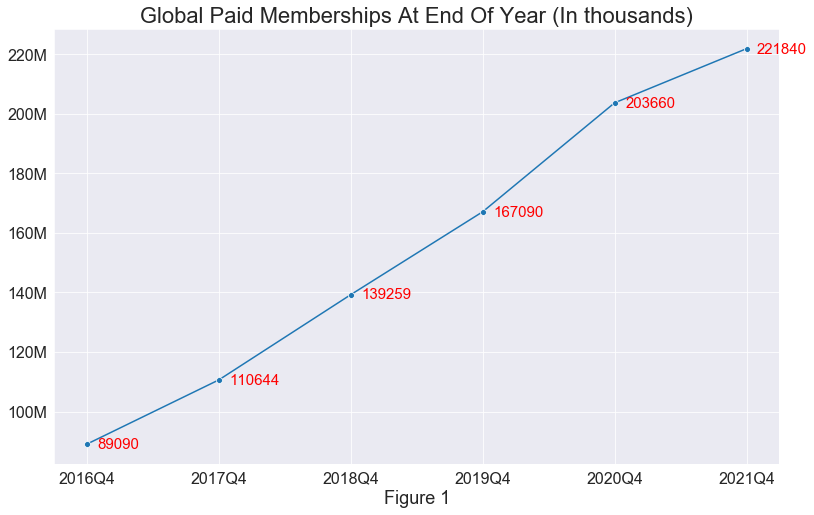

In [62]:
plt.figure(figsize=(13,8))

fig1 = sns.lineplot(x="Year", y="Paid memberships at end of period", data=df_q4, palette='bright', marker='o')
plt.ylabel('')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Figure 1',fontsize=18)
fig1.set_xticklabels(['0','2016Q4','2017Q4','2018Q4','2019Q4','2020Q4','2021Q4'])
fig1.set_yticklabels(['0M','100M','120M','140M','160M','180M','200M', '220M'])
fig1.set_title('Global Paid Memberships At End Of Year (In thousands)', fontsize=22)

# label points on the plot
for x, y in zip(df_q4['Year'], df_q4['Paid memberships at end of period']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x+0.08, # x-coordinate position of data label
          y = y-1500, # y-coordinate position of data label, adjusted to be 150 below the data point
          s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
          color = 'r',
          fontsize = 15) # set colour of line
    
plt.savefig('Membership Growth')

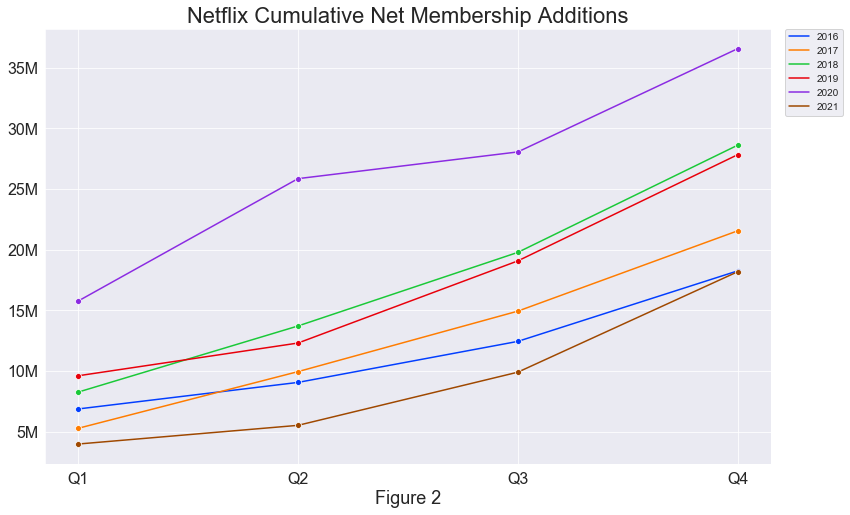

In [63]:
plt.figure(figsize=(13,8))

fig2 = sns.lineplot(x="Quarter", y="addition_member_cum", hue="Year", data=df_member, palette='bright', marker='o')
plt.legend(loc='upper right')
fig2.set_yticklabels(['0M','5M','10M','15M','20M','25M','30M','35M'])
plt.ylabel('')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Figure 2',fontsize=18)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig2.set_title('Netflix Cumulative Net Membership Additions', fontsize=22)

plt.savefig('Cumulative_Member_Addition')